In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Question 1**

## **Part 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/prml/lab-11/data_banknote_authentication.csv", header=None,names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


'Cream Lines in the graph indicates the empty values'

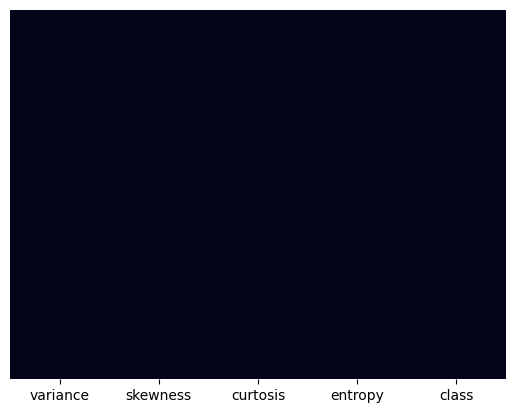

In [ ]:
#checking the empty values
data.isnull()
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
'''Cream Lines in the graph indicates the empty values'''

Since there are no cream lines the dataset has no missing values

In [ ]:
from sklearn.preprocessing import StandardScaler

# Split the dataset into features and target
X = data.drop('class', axis=1)
y = data['class']

# Normalize the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training, testing, and validation sets with 70:20:10 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

# Print the shape of each set
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (960, 4) (960,)
Validation set shape: (136, 4) (136,)
Testing set shape: (276, 4) (276,)


### **Part 2**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Define a list of values for C
C_values = [0.1, 1, 10, 100, 1000]

# Train the SVM classifier for each value of C and evaluate its performance
for C in C_values:
    # Create an instance of SVM classifier with a linear kernel
    svm = SVC(kernel='linear', C=C)

    # Train the classifier on the training data
    svm.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = svm.predict(X_test)

    # Compute the classification accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    print(f'C = {C}, Accuracy = {accuracy}')


C = 0.1, Accuracy = 0.9818840579710145
C = 1, Accuracy = 0.9855072463768116
C = 10, Accuracy = 0.9927536231884058
C = 100, Accuracy = 0.9927536231884058
C = 1000, Accuracy = 0.9927536231884058


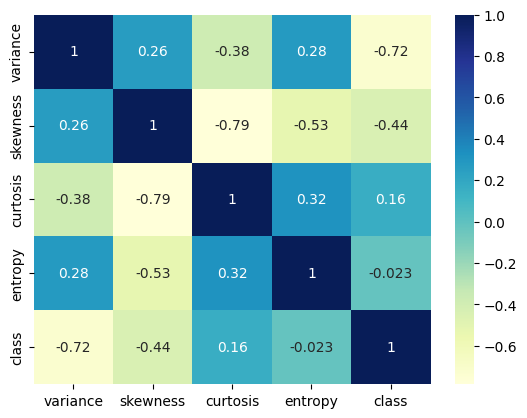

In [ ]:
data.corr()
corrplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

Clearly we can see Curtosis and Entropy high correlation with the class column

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Select the two features that have the highest correlation with the target
features = np.argsort(np.abs(corr_matrix['class']))[-5:-3]
print('Selected features:', corr_matrix.index[features])

# Extract the selected features from the data
X_features = X[:, features]

Selected features: Index(['entropy', 'curtosis'], dtype='object')


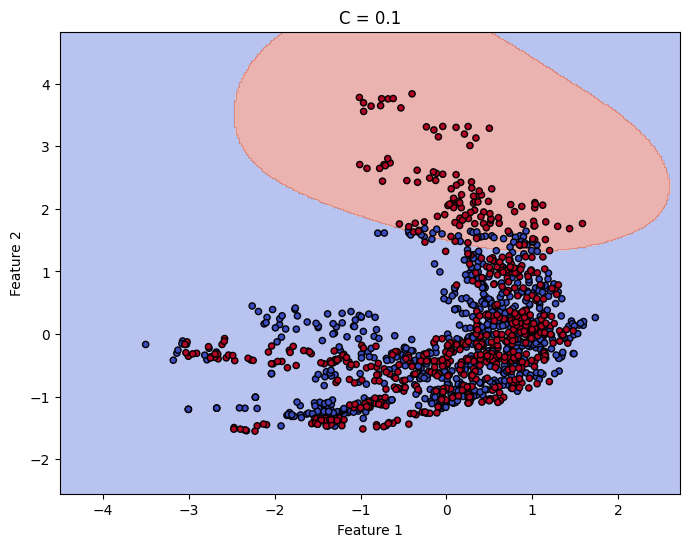

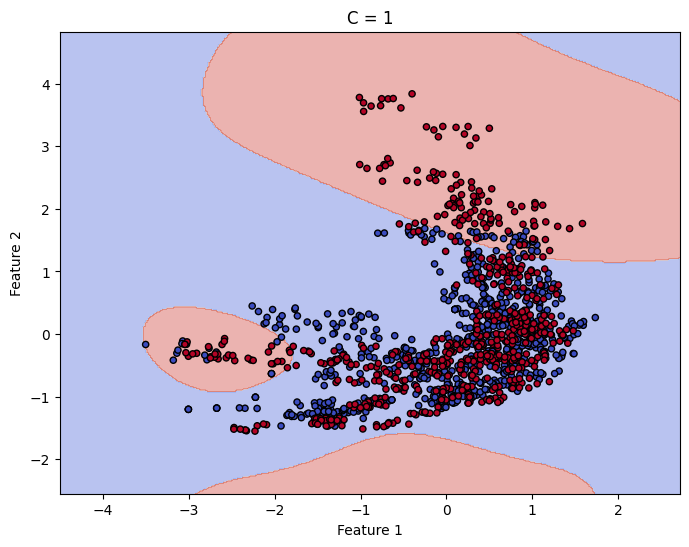

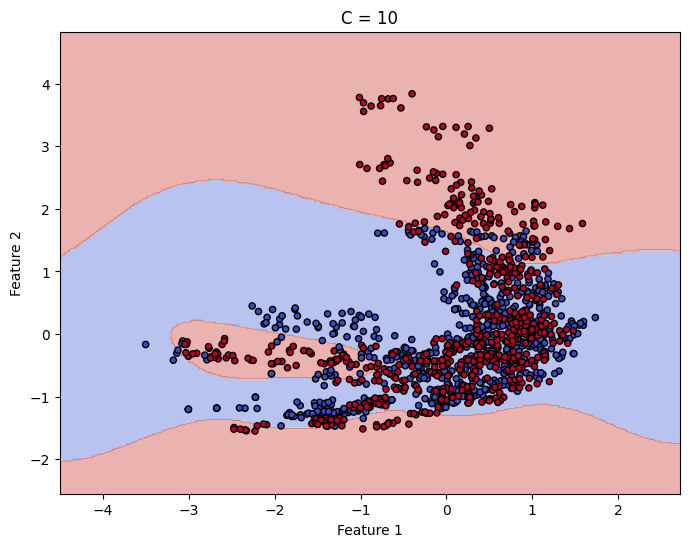

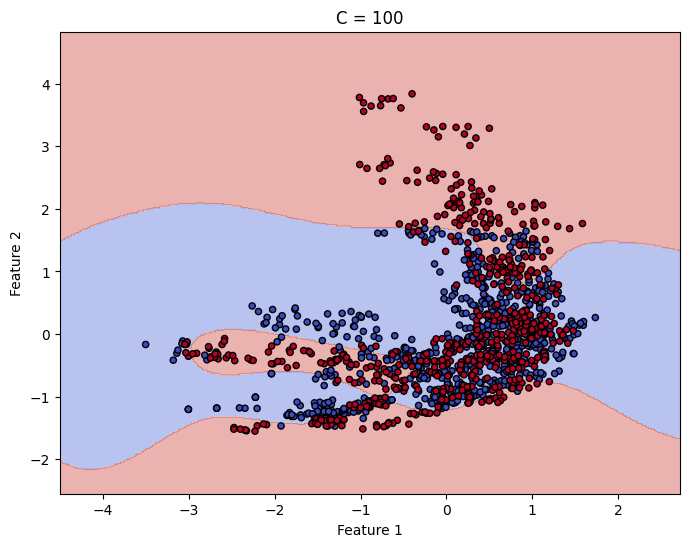

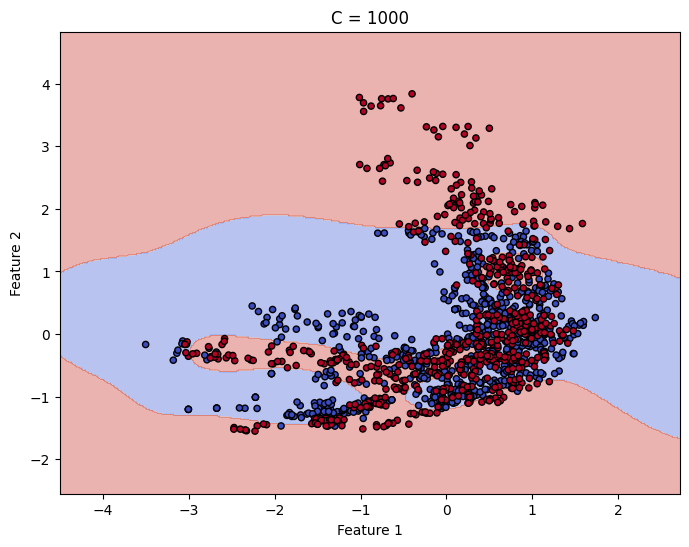

In [ ]:
# Plot the decision boundaries for each value of C
for i, C in enumerate(C_values):
    # Create an instance of SVM classifier with a linear kernel
    svm = SVC(C=C)
    y = y
    # Train the classifier on the data
    svm.fit(X_features, y)

    # Define the mesh grid for plotting
    x_min, x_max = X_features[:, 0].min() - 1, X_features[:, 0].max() + 1
    y_min, y_max = X_features[:, 1].min() - 1, X_features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=(8, 6))
    plt.title(f'C = {C}')
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.4)

    # Plot the training points
    plt.scatter(X_features[:, 0], X_features[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

### **Part 3**

Accuracy is  :  58.08823529411765 when kernel is  linear


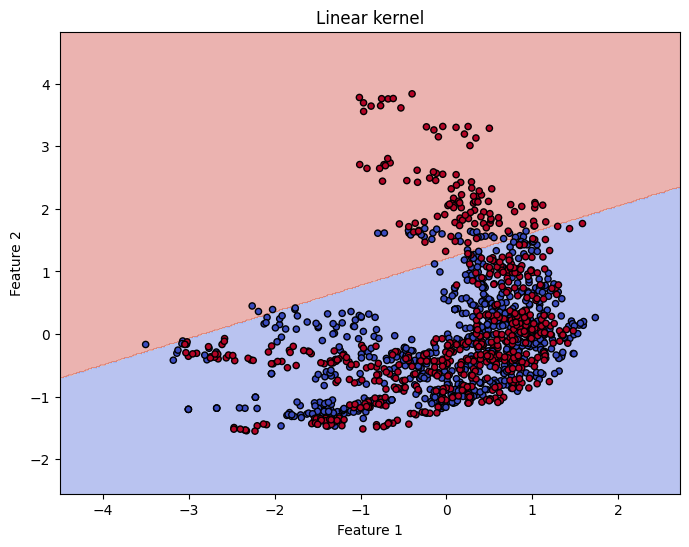

Accuracy is  :  58.82352941176471 when kernel is  poly


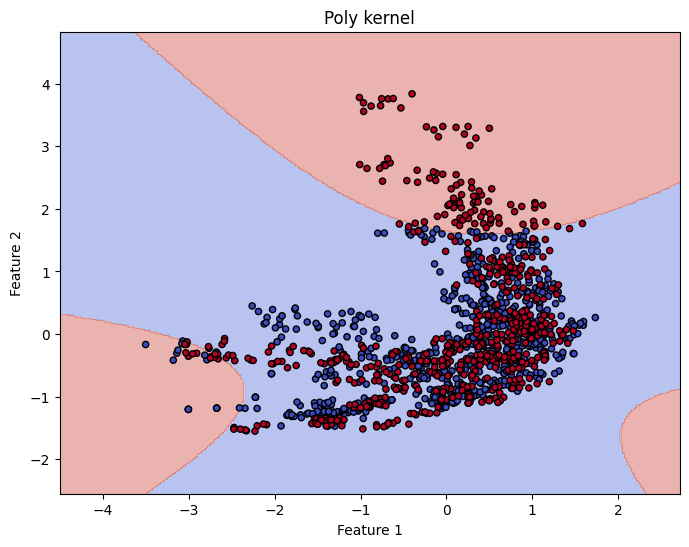

Accuracy is  :  59.55882352941176 when kernel is  rbf


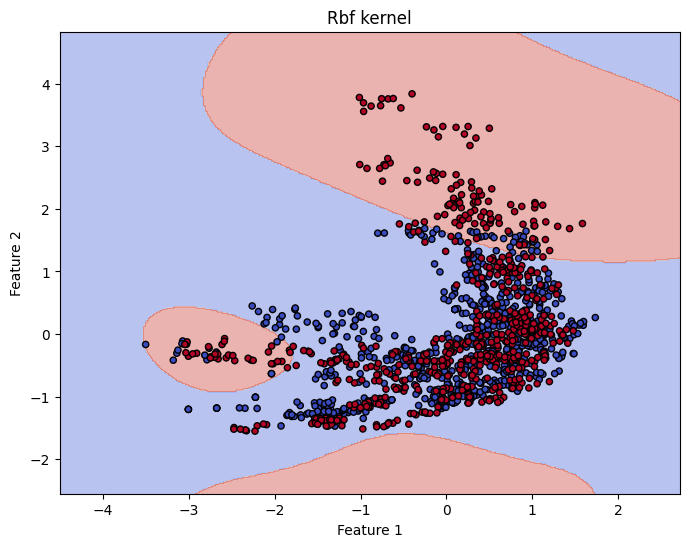

Accuracy is  :  39.705882352941174 when kernel is  sigmoid


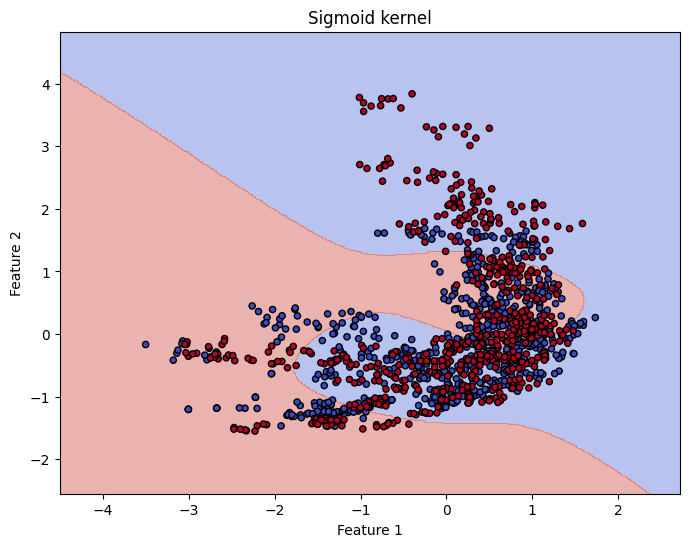

In [ ]:
# Define a list of kernels to use
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Train the SVM models using different kernels
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_features, y.ravel())

    X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Accuracy is  : ", accuracy * 100, "when kernel is ",kernel)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.title(f'{kernel.capitalize()} kernel')
    x_min, x_max = X_features[:, 0].min() - 1, X_features[:, 0].max() + 1
    y_min, y_max = X_features[:, 1].min() - 1, X_features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.4)
    plt.scatter(X_features[:, 0], X_features[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
